Régression GP avec incertitude (en 1D)

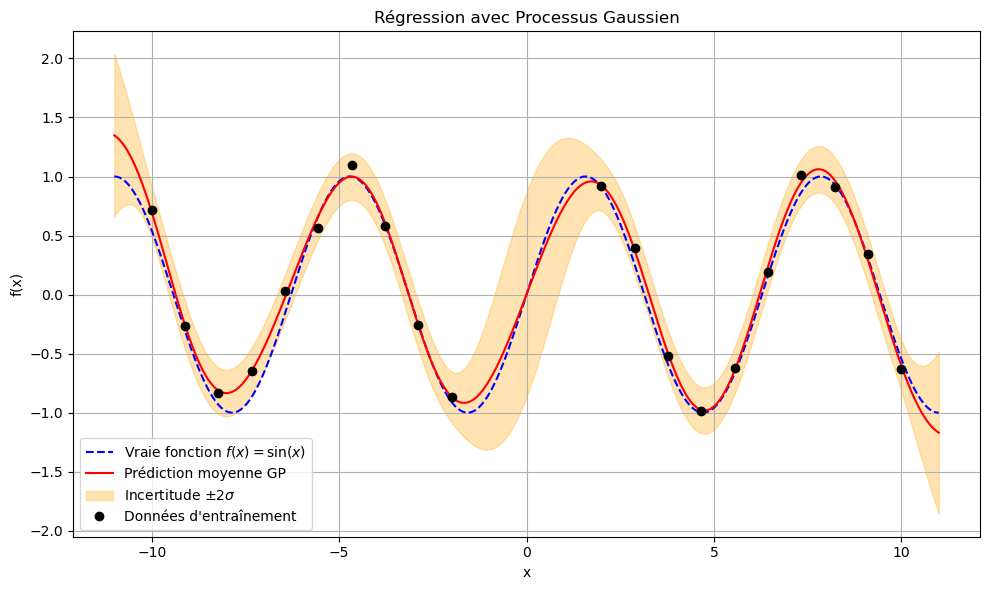

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import warnings

warnings.filterwarnings("ignore")

# Fonction réelle
def f(x):
    return np.sin(x)

# Générateur aléatoire pour le bruit
rng = np.random.RandomState(0)

# 🔢 Création des points d'entraînement 
X_left = np.linspace(-10, -2, 10).reshape(-1, 1)
X_center = np.linspace(-1.5, 1.5, 0).reshape(-1, 1)
X_right = np.linspace(2, 10, 10).reshape(-1, 1)  
X_train = np.vstack((X_left, X_center, X_right))
y_train = f(X_train).ravel() + rng.normal(0, 0.1, X_train.shape[0])  # on ajoute un bruit léger

# Points de test pour la prédiction
X_test = np.linspace(-11, 11, 1000).reshape(-1, 1)

# 🔧 On Définit un noyau avec une meilleure borne inférieure pour le bruit
kernel = RBF(length_scale=2.0) + WhiteKernel(noise_level=0.01, noise_level_bounds=(1e-3, 1e+1))

# Modèle de régression avec processus gaussien
gp = GaussianProcessRegressor(kernel=kernel, random_state=0)
gp.fit(X_train, y_train)

# Prédiction
y_pred, y_std = gp.predict(X_test, return_std=True)

# 📈 Visualisation
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), 'b--', label=r"Vraie fonction $f(x)=\sin(x)$")  # corrigé
plt.plot(X_test, y_pred, 'r-', label="Prédiction moyenne GP")
plt.fill_between(X_test.ravel(), y_pred - 2*y_std, y_pred + 2*y_std, alpha=0.3, color='orange', label=r"Incertitude $\pm 2\sigma$")
plt.plot(X_train, y_train, 'ko', label="Données d'entraînement")

plt.title("Régression avec Processus Gaussien")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()
